# Play_Store EDA Analysis and Visulaization:-

## 1. Import required libraries and read the dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the CSV Data set of the playstore data:-
Play_store = pd.read_csv("Apps_data+(1).csv")

In [3]:
# Making a copy of a data
df = Play_store.copy()

In [4]:
# Checking the columns:-
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

## 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [5]:
# checking the first few samples of the data set
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2212,Palace Pets in Whisker Haven,FAMILY,4.1,47213,14M,"5,000,000+",Free,0,Everyone,Entertainment;Pretend Play,"December 9, 2017",1.8,4.2 and up
6540,BN Pro Black Text on White,LIBRARIES_AND_DEMO,3.9,53,334k,"10,000+",Free,0,Everyone,Libraries & Demo,"February 5, 2017",2.3.2,1.6 and up
3861,Alopec - Online Shipping System,MAPS_AND_NAVIGATION,4.3,1240,14M,"100,000+",Free,0,Everyone,Maps & Navigation,"November 2, 2017",2.4.1,4.1 and up
3940,Zombie Tsunami,GAME,4.4,4918776,Varies with device,"100,000,000+",Free,0,Everyone 10+,Arcade,"June 15, 2018",Varies with device,Varies with device
1094,Stash: Invest. Learn. Save.,FINANCE,4.2,11919,23M,"1,000,000+",Free,0,Everyone,Finance,"July 27, 2018",1.13.2.11,4.4 and up


In [6]:
# checking the shape of the data:-
df.shape
#so, this consist of about 10841 rows and 13 columns

(10841, 13)

In [7]:
# checking the info of the data
df.info()
#So ,this data set consists of 13 columns, 12 colums except Rating all the other were object data type 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# 3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model building.

In [8]:
# This data sets only holds the Rating column as numerical column:-
df.describe()
#This consist of Rating count of 9367
# mean of 4.19
# Std of 0.537
# Further are shown below

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [9]:
# Getting the object columns and describing the attributes:-
df.describe(include="O")
# Some App Holds max top user review of 10,00,000+ count with max frequency of 1579

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,596,1695,1579,10039,10040,8714,842,326,1459,2451


# 4. Check if there are any duplicate records in the dataset? if any drop them.

In [10]:
#So,this data consist of duplicated records of around 483 rows which is needed to be removed...
df[df.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


In [11]:
# As mentioned in the data .duplicates function will remove the duplicates and it will keep the first occurance of the dataset

In [12]:
# Dropping the duplicates...
df.drop_duplicates(inplace=True,keep="last")

In [13]:
# Checking the data set for duplicates.. sucessfully removed the duplicates of repeated occcurance and kept the first occaarnce removed the last occorance of the data...
df.duplicated().sum()

0

# 5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.


In [14]:
# Using unique function to get the unique category in the Whole array:- 
df["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [15]:
# Found the invalid category with 1.9 alphanumeric which needed to be removed...
df[df["Category"]=="1.9"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [16]:
df["Category"].nunique()

34

In [17]:
# This variable only holds a categorical value of 1.9 as its category which is invalid column need to dropped out all the others were showing the unique results
df.drop(index=10472,axis=0,inplace=True)

In [18]:
# Again Ckecking if there the invalid value of category is present or not:-
df["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

# 6. Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)

In [19]:
# Checking the number of rows which were null values:-
df["Rating"].isnull().sum()

1465

In [20]:
# Showing the data frame with null values:-
df[df["Rating"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


In [21]:
df["Rating"].shape

(10357,)

In [22]:
# Next step is to drop those null values:-
df.dropna(subset=["Rating"],inplace=True)

In [23]:
df["Rating"].shape

(8892,)

In [24]:
# Checking the null values once it ha been dropped out:-
df["Rating"].isnull().sum()

0

In [25]:
# To create the new column as Rating_Category by converting ratings to high and low categories(>3.5 is high rest low)
# using Lambda Function to achieve the condition:-
df["Rating_category"] = df["Rating"].apply(lambda x: "High" if x>3.5 else "Low")

In [26]:
#Checking the unique values that the function applied the given conditions or not:-
df["Rating_category"].unique()

array(['High', 'Low'], dtype=object)

In [27]:
# Also taking the random samples to find the same:-
df.sample()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
8288,McClatchy DC Bureau,NEWS_AND_MAGAZINES,4.3,80,8.7M,"5,000+",Free,0,Everyone 10+,News & Magazines,"June 18, 2018",6.0.1,4.4W and up,High


# 7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution.

In [28]:
df["Rating_category"].value_counts()

High    8012
Low      880
Name: Rating_category, dtype: int64

In [29]:
# Checking the percentages of the values:-
df["Rating_category"].value_counts()*100/len(df["Rating"])

High    90.103464
Low      9.896536
Name: Rating_category, dtype: float64

In [30]:
# So the Rating of High_category value holds High percentage of 90.103,
# Followed by the low_rating category holds a percentage of 9.8956.

In [31]:
# This signifies that this data set holds a good High Rating category, than the low Rating category..

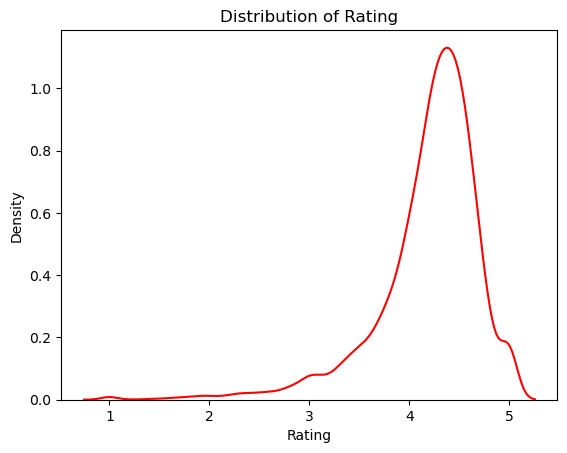

In [32]:
# From the distribution plot of Rating Column itself shows that it consist of data set of values in the range of 3.5 to 5 so, from this we can conclude that it has Higher rating Apps.
sns.distplot(df.Rating,hist=False,color="Red")
plt.title("Distribution of Rating")
plt.show()

# This plot clearly shows that the distribution is negatively skewed which says the median id greater than mean....


In [33]:
# Also for confirmation using the describe funtion to prove the above given statement...
df["Rating"].describe()

count    8892.000000
mean        4.187877
std         0.522377
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

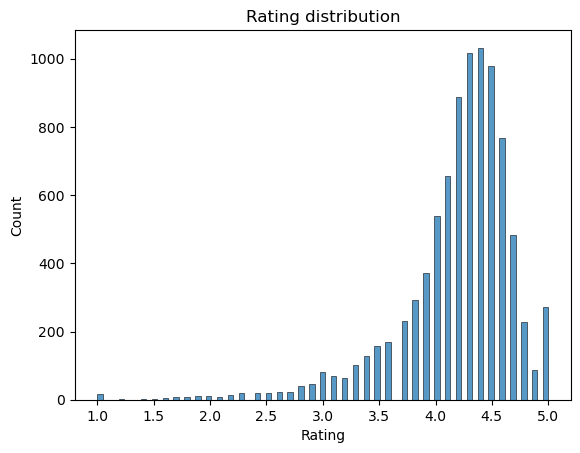

In [34]:
sns.histplot(df["Rating"])
plt.title("Rating distribution")
plt.show()

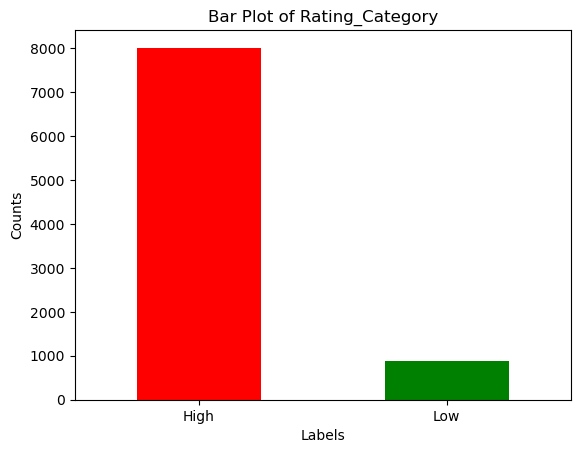

In [35]:
# Else also showing the values in Bar plot too...
df["Rating_category"].value_counts().plot(kind="bar",rot=0,color=["red","green"])
plt.xlabel("Labels")
plt.ylabel("Counts")
plt.title("Bar Plot of Rating_Category")
plt.show()

# 8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.(Hint: Use log transformation)

In [36]:
# Converting the object data type and assigning the Reviews column to int data type
df["Reviews"] = df["Reviews"].astype(int)

In [37]:
# Assigned and checking the info for its dtype..
df["Reviews"].info()

<class 'pandas.core.series.Series'>
Int64Index: 8892 entries, 0 to 10840
Series name: Reviews
Non-Null Count  Dtype
--------------  -----
8892 non-null   int32
dtypes: int32(1)
memory usage: 104.2 KB


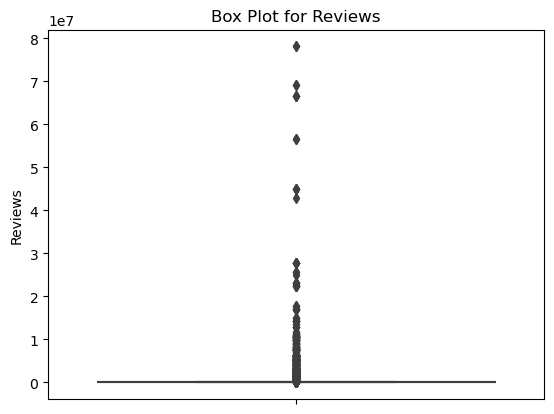

In [38]:
# Checking for Outliers:-
sns.boxplot(data = df, y = df["Reviews"])
plt.title("Box Plot for Reviews")
plt.show()

# Yes, this box plot shows that there is many outliers present...

In [39]:
# Yes this Review section holds outliers which is need to be removed 

In [40]:
# since there were so many outliers which were more than the maximum:-
# Importing sklearn for log Transforming..

from sklearn.preprocessing import FunctionTransformer

FT = FunctionTransformer(np.log1p) # Instantiating the function...

FT #Calling the function

FunctionTransformer(func=<ufunc 'log1p'>)

In [41]:
df["Reviews"].isnull().sum()

0

In [42]:
# using the fit and transform function to tranform the maxmimum outliers

# Assigning the variable "Reviews_tranform" to avoid change in the original data...
df["Reviews"] = FT.fit_transform(df[["Reviews"]])

In [43]:
# Assigned Succesfully and checking the head for inferences...
df["Reviews"].head()

0     5.075174
1     6.875232
2    11.379520
3    12.281389
4     6.875232
Name: Reviews, dtype: float64

In [44]:
# Describing to get the statistical summary...
df["Reviews"].describe()

count    8892.000000
mean        8.259044
std         3.839224
min         0.693147
25%         5.105945
50%         8.458610
75%        11.174199
max        18.174247
Name: Reviews, dtype: float64

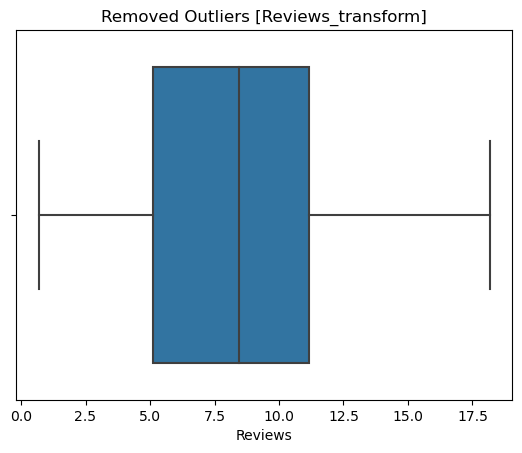

In [46]:
# After using the Box plot which removed the outliers in it. showed below with change in range...
sns.boxplot(df["Reviews"])
plt.title("Removed Outliers [Reviews_transform]")
plt.show()

# 9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where size='Varies with device')

In [47]:
# This Size column consist of 1468 rows of Varies with device variable..
df[df["Size"]=="Varies with device"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
37,Floor Plan Creator,ART_AND_DESIGN,4.1,10.508896,Varies with device,"5,000,000+",Free,0,Everyone,Art & Design,"July 14, 2018",Varies with device,2.3.3 and up,High
42,Textgram - write on photos,ART_AND_DESIGN,4.4,12.595483,Varies with device,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device,High
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,9.744375,Varies with device,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device,High
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,10.601921,Varies with device,"5,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device,High
68,REPUVE,AUTO_AND_VEHICLES,3.9,5.877736,Varies with device,"100,000+",Free,0,Everyone,Auto & Vehicles,"May 25, 2018",Varies with device,Varies with device,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10713,My Earthquake Alerts - US & Worldwide Earthquakes,WEATHER,4.4,8.152486,Varies with device,"100,000+",Free,0,Everyone,Weather,"July 24, 2018",Varies with device,Varies with device,High
10725,Posta App,MAPS_AND_NAVIGATION,3.6,2.197225,Varies with device,"1,000+",Free,0,Everyone,Maps & Navigation,"September 27, 2017",Varies with device,4.4 and up,High
10765,Chat For Strangers - Video Chat,SOCIAL,3.4,6.434547,Varies with device,"100,000+",Free,0,Mature 17+,Social,"May 23, 2018",Varies with device,Varies with device,Low
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,11.390611,Varies with device,"5,000,000+",Free,0,Mature 17+,Social,"March 23, 2018",Varies with device,Varies with device,High


In [48]:
# Dropping the size which contains Varies with device:-
df.drop(df[df["Size"]=="Varies with device"].index,inplace=True)          

In [49]:
#Checking the same dropped successfully:-
df[df["Size"]=="Varies with device"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category


In [50]:
df["Size"].isnull().sum()

0

In [51]:
df["Size"].value_counts()

14M     154
13M     152
12M     151
11M     150
15M     149
       ... 
454k      1
812k      1
442k      1
842k      1
619k      1
Name: Size, Length: 413, dtype: int64

In [52]:
# Replacing the variable M and K with their respective values using the replace and apply function..
df["Size"] = df["Size"].replace({"M":"*1e6","k":"*1e3"},regex=True).apply(pd.eval).astype(int)

In [53]:
df["Size"].info

<bound method Series.info of 0        19000000
1        14000000
2         8700000
3        25000000
4         2800000
           ...   
10833      619000
10834     2600000
10836    53000000
10837     3600000
10840    19000000
Name: Size, Length: 7424, dtype: int32>

# 10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.


In [54]:
#using the replace function to remove the unwanted characters and converted all the unwanted characters into integer data type..
df["Installs"]=df["Installs"].str.replace(",","").str.replace("+","").astype(int)

In [55]:
df["Installs"]

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10833        1000
10834         500
10836        5000
10837         100
10840    10000000
Name: Installs, Length: 7424, dtype: int32

# 11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type

In [56]:
# Checking the unique values:-
df["Price"].unique()

array(['0', '$4.99', '$6.99', '$7.99', '$3.99', '$5.99', '$2.99', '$1.99',
       '$9.99', '$0.99', '$3.49', '$10.99', '$7.49', '$1.50', '$15.99',
       '$79.99', '$9.00', '$24.99', '$10.00', '$16.99', '$11.99',
       '$29.99', '$14.99', '$5.49', '$33.99', '$12.99', '$39.99',
       '$19.99', '$4.49', '$1.70', '$1.49', '$3.88', '$399.99', '$17.99',
       '$400.00', '$2.49', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61',
       '$1.59', '$6.49', '$1.29', '$299.99', '$379.99', '$37.99',
       '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00', '$3.08',
       '$2.59', '$19.40', '$15.46', '$8.99', '$3.04', '$13.99', '$4.29',
       '$3.28', '$4.60', '$1.00', '$2.90', '$1.97', '$2.56', '$1.20'],
      dtype=object)

In [57]:
# Using the same replace function along with datatype as float
df["Price"] = df["Price"].str.replace("$","").astype(float)

In [58]:
# Chexking the unique for confirmation that all the columns were changed or not
df["Price"].unique()

array([  0.  ,   4.99,   6.99,   7.99,   3.99,   5.99,   2.99,   1.99,
         9.99,   0.99,   3.49,  10.99,   7.49,   1.5 ,  15.99,  79.99,
         9.  ,  24.99,  10.  ,  16.99,  11.99,  29.99,  14.99,   5.49,
        33.99,  12.99,  39.99,  19.99,   4.49,   1.7 ,   1.49,   3.88,
       399.99,  17.99, 400.  ,   2.49,   3.02,   1.76,   4.84,   4.77,
         1.61,   1.59,   6.49,   1.29, 299.99, 379.99,  37.99,  18.99,
       389.99,   8.49,   1.75,  14.  ,   2.  ,   3.08,   2.59,  19.4 ,
        15.46,   8.99,   3.04,  13.99,   4.29,   3.28,   4.6 ,   1.  ,
         2.9 ,   1.97,   2.56,   1.2 ])

# 12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated','Current Ver','Android Ver' columns since which are redundant for our analysis)

In [59]:
# Creating a copy for future reference...
df1 = df.copy()

In [60]:
# Dropping out the redundant data columns which is not required for the model analyis... and also dropping the Reviews column since we have added Transformed Revies column to the frame..
df.drop(["App", "Rating" ,"Genres","Last Updated","Current Ver","Android Ver"],axis=1,inplace=True)

In [61]:
# Showing the dropped columns:-
df

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,ART_AND_DESIGN,5.075174,19000000,10000,Free,0.0,Everyone,High
1,ART_AND_DESIGN,6.875232,14000000,500000,Free,0.0,Everyone,High
2,ART_AND_DESIGN,11.379520,8700000,5000000,Free,0.0,Everyone,High
3,ART_AND_DESIGN,12.281389,25000000,50000000,Free,0.0,Teen,High
4,ART_AND_DESIGN,6.875232,2800000,100000,Free,0.0,Everyone,High
...,...,...,...,...,...,...,...,...
10833,BOOKS_AND_REFERENCE,3.806662,619000,1000,Free,0.0,Everyone,High
10834,FAMILY,2.079442,2600000,500,Free,0.0,Everyone,High
10836,FAMILY,3.663562,53000000,5000,Free,0.0,Everyone,High
10837,FAMILY,1.609438,3600000,100,Free,0.0,Everyone,High


# 13. Encode the categorical columns.

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7424 entries, 0 to 10840
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Category         7424 non-null   object 
 1   Reviews          7424 non-null   float64
 2   Size             7424 non-null   int32  
 3   Installs         7424 non-null   int32  
 4   Type             7424 non-null   object 
 5   Price            7424 non-null   float64
 6   Content Rating   7424 non-null   object 
 7   Rating_category  7424 non-null   object 
dtypes: float64(2), int32(2), object(4)
memory usage: 464.0+ KB


In [63]:
#Selecting the data types of object only... with respect to columns..
category = df.select_dtypes(include="O").columns.drop("Rating_category")

In [64]:
df["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [65]:
df["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [66]:
df["Type"].unique()

array(['Free', 'Paid'], dtype=object)

In [67]:
# Checking the category columns:-
category

Index(['Category', 'Type', 'Content Rating'], dtype='object')

In [68]:
# Making a copy of df for using it another Encoding Techniques:-
df1 = df.copy()

In [69]:
# Encoded using Ordinal assignment:-
ordinal_rank = {}
for column in ["Category","Type","Content Rating","Rating_category"]:
    category_counts = df[column].value_counts().sort_values()

    ranking_dict = {}
    rank = 0
    for cat in category_counts.index:
        ranking_dict[cat] = rank
        rank +=1
    
    ordinal_rank[column] = ranking_dict    

In [70]:
# oridinal_rank for label encoding:--
ordinal_rank

{'Category': {'BEAUTY': 0,
  'EVENTS': 1,
  'PARENTING': 2,
  'COMICS': 3,
  'HOUSE_AND_HOME': 4,
  'WEATHER': 5,
  'ART_AND_DESIGN': 6,
  'LIBRARIES_AND_DEMO': 7,
  'AUTO_AND_VEHICLES': 8,
  'ENTERTAINMENT': 9,
  'FOOD_AND_DRINK': 10,
  'EDUCATION': 11,
  'MAPS_AND_NAVIGATION': 12,
  'VIDEO_PLAYERS': 13,
  'DATING': 14,
  'BOOKS_AND_REFERENCE': 15,
  'TRAVEL_AND_LOCAL': 16,
  'SHOPPING': 17,
  'NEWS_AND_MAGAZINES': 18,
  'SOCIAL': 19,
  'HEALTH_AND_FITNESS': 20,
  'COMMUNICATION': 21,
  'PHOTOGRAPHY': 22,
  'BUSINESS': 23,
  'PRODUCTIVITY': 24,
  'SPORTS': 25,
  'FINANCE': 26,
  'LIFESTYLE': 27,
  'MEDICAL': 28,
  'PERSONALIZATION': 29,
  'TOOLS': 30,
  'GAME': 31,
  'FAMILY': 32},
 'Type': {'Paid': 0, 'Free': 1},
 'Content Rating': {'Unrated': 0,
  'Adults only 18+': 1,
  'Everyone 10+': 2,
  'Mature 17+': 3,
  'Teen': 4,
  'Everyone': 5},
 'Rating_category': {'Low': 0, 'High': 1}}

In [71]:
# Mapping the Encoded labels:-
for column, ranking_dict in ordinal_rank.items():
    df[column] =df[column].map(ranking_dict)

In [72]:
#Encoded Data Frame:-
df

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,6,5.075174,19000000,10000,1,0.0,5,1
1,6,6.875232,14000000,500000,1,0.0,5,1
2,6,11.379520,8700000,5000000,1,0.0,5,1
3,6,12.281389,25000000,50000000,1,0.0,4,1
4,6,6.875232,2800000,100000,1,0.0,5,1
...,...,...,...,...,...,...,...,...
10833,15,3.806662,619000,1000,1,0.0,5,1
10834,32,2.079442,2600000,500,1,0.0,5,1
10836,32,3.663562,53000000,5000,1,0.0,5,1
10837,32,1.609438,3600000,100,1,0.0,5,1


In [73]:
#Checking the Head of the Data Frame:-
df.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,6,5.075174,19000000,10000,1,0.0,5,1
1,6,6.875232,14000000,500000,1,0.0,5,1
2,6,11.379520,8700000,5000000,1,0.0,5,1
3,6,12.281389,25000000,50000000,1,0.0,4,1
4,6,6.875232,2800000,100000,1,0.0,5,1


# Another Method to encode the Categorical varibles is to use One Hot Encoding,...

In [74]:
# Encoded the categorical data in the variable category.. and using the get_dummies function to encode the text variable..
Encoded = pd.get_dummies(df1,columns=category,drop_first=True)

In [75]:
#Checking the encoded items of a respective object..
Encoded

,Reviews,Size,Installs,Price,Rating_category,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,5.075174,19000000,10000,0.0,High,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,6.875232,14000000,500000,0.0,High,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,11.379520,8700000,5000000,0.0,High,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,12.281389,25000000,50000000,0.0,High,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,6.875232,2800000,100000,0.0,High,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,3.806662,619000,1000,0.0,High,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
10834,2.079442,2600000,500,0.0,High,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10836,3.663562,53000000,5000,0.0,High,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10837,1.609438,3600000,100,0.0,High,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


#### Since this type of Encoding holds a high number of columns the model will undergo overfitting, this model is not considered.

# 14. Segregate the target and independent features (Hint: Use Rating_category as the target)

In [76]:
# Since the Rating category consist of two variables one is High and another one is low need to take 2 independent variable for the model to segregate the targets....
x = df.drop(columns=["Rating_category"],axis=1)
y = df[["Rating_category"]]

In [77]:
print(x)
print(y)

       Category    Reviews      Size  Installs  Type  Price  Content Rating
0             6   5.075174  19000000     10000     1    0.0               5
1             6   6.875232  14000000    500000     1    0.0               5
2             6  11.379520   8700000   5000000     1    0.0               5
3             6  12.281389  25000000  50000000     1    0.0               4
4             6   6.875232   2800000    100000     1    0.0               5
...         ...        ...       ...       ...   ...    ...             ...
10833        15   3.806662    619000      1000     1    0.0               5
10834        32   2.079442   2600000       500     1    0.0               5
10836        32   3.663562  53000000      5000     1    0.0               5
10837        32   1.609438   3600000       100     1    0.0               5
10840        27  12.894981  19000000  10000000     1    0.0               5

[7424 rows x 7 columns]
       Rating_category
0                    1
1                

In [78]:
# Checking the x variable
x.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating
0,6,5.075174,19000000,10000,1,0.0,5
1,6,6.875232,14000000,500000,1,0.0,5
2,6,11.379520,8700000,5000000,1,0.0,5
3,6,12.281389,25000000,50000000,1,0.0,4
4,6,6.875232,2800000,100000,1,0.0,5


In [79]:
# Checking the y variable of Rating category target varible...
y.head()

,Rating_category
0,1
1,1
2,1
3,1
4,1


# 15. Split the dataset into train and test.

In [80]:
# Splitting the data set into train, test and split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=42)

In [81]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(5196, 7) (2228, 7)
(5196, 1) (2228, 1)


# 16. Standardize the data, so that the values are within a particular range.

In [82]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler

StandardScaler()

In [83]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [84]:
# Standardized x_train:-
print(x_train)
print(y_train)

[[ 0.90878432 -1.49597059 -0.72773152 ...  0.28169468 -0.06360416
   0.43233695]
 [-0.44646072  1.20491497 -0.41206076 ...  0.28169468 -0.06360416
  -2.26444913]
 [ 0.66237613  1.37610331 -0.88983273 ...  0.28169468 -0.06360416
   0.43233695]
 ...
 [-2.66413441  0.24587648 -0.7021366  ...  0.28169468 -0.06360416
   0.43233695]
 [-2.54093032  0.08087626 -0.59975689 ...  0.28169468 -0.06360416
   0.43233695]
 [-0.56966481 -0.71597203 -0.95697675 ...  0.28169468 -0.06360416
   0.43233695]]
       Rating_category
6816                 1
435                  1
3331                 1
5686                 1
3750                 1
...                ...
7761                 1
7801                 1
7992                 1
1457                 1
10600                0

[5196 rows x 1 columns]


In [85]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

In [86]:
model = lg.fit(x_train,y_train)

In [87]:
model.score(x_train,y_train)

0.8881832178598922

In [88]:
model.score(x_test,y_test)

0.8904847396768402

From this inference of Logistic model which is holding a good R2 value of 0.88, close enough to test data score.

# Thankyou :)